In [ ]:
#IDEE DA SVILLUPPARE
#1.Crea nuova colonna dataset in cui ogni riga c'è il numero di lettere del nome dell'animale
#2.Trova altri dati da aggiungere/dataset più grande o simile
#3.Guarda medium, datafish, towardsdatascience e altri
#6.Embedding?? + pca riduce complessità
#7.Trasformare i dati binari in dati discreti
#8.crea una classe
#9.il file piccolo è quello da usare per confrontare i risultati

<div class="alert alert-info" style="background-color:DodgerBlue; color:white; padding:0px 5px; border-radius:15px; opacity: 0.8; border-color:DodgerBlue">
    <h2 style='margin:10px 5px; font-size:35px; text-align: center'> Progetto Finale - Programming with Python 
    </h2>
</div>

<div class="alert alert-info" style="background-color:orange; color:black; padding:0px 5px; border-radius:15px; border-color:orange">
    <h2 style='margin:10px 5px; font-size:14px; font-style:italic; text-align: center'> Studenti: Laura Proto & Giacomo de Gioia </h2>
</div>

## Traccia numero 6 - I mammiferi depongono uova?
### I dataset Zoo fornisce una serie di dati relativi a diverse specie animali al fine di classificarle in 7 diverse classi, ovvero mammiferi, uccelli, rettili, pesci, anfibi, insetti e invertebrati.
Seguendo un approccio non supervisionato, ovvero senza osservare la classe di ogni specie animale, il progetto mira a confrontare le diverse specie e raggruparle utilizzando diversi algoritmi di clustering.
Confrontando poi il risultato di ogni algoritmo, si intende mostrare quale algoritmo di clustering approssimi meglio le classi fornite dal dataset.
Si richiede pertanto non solo di definire una metodologia per confrontare i risulati del clustering con la classificazione attesa, ma anche di descrivere in modo sintetico le caratteristiche distintive di ciascun cluster di specie prodotto dall'algoritmo oggetto della valutazione.

https://www.kaggle.com/uciml/zoo-animal-classification

https://scikit-learn.org/stable/modules/clustering.html



**Clustering** --> unsupervised classification:

– Come per la classificazione, lo scopo è segmentare i dati, ma senza assegnare etichette di classe

– Non ci sono infatti classi predefinite: ogni cluster può essere interpretato come una classe di oggetti simili

<div class="alert alert-info" style="background-color:LightGray; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:25px; text-decoration: underline'> 0. Installazioni e Import preliminari </h2>
</div>

In [ ]:
#Install all the libraries the project needs
#Please lauch from a command line shell Python, NOT HERE, the code:
#pip install -r requirements.txt  ----------------> RICORDATI DI AGGIORNARLO (troppo complesso da automatizzare)

#fatti dire da python il numero della versione e riportala nel file - file dichiarativi

In [3]:
#Import usefull
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import squarify 
import sklearn
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
import utils as ut
from googletrans import Translator, constants
from pprint import pprint
from sklearn.metrics import silhouette_score, silhouette_samples, normalized_mutual_info_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram

https://www.intelligenzaartificialeitalia.net/post/analisi-esplorativa-dati-con-python-analisi-esplorativa-dei-dati-eda-esempio-pratico

https://www.diariodiunanalista.it/posts/analisi-esplorativa-dei-dati-con-python-e-pandas/

<div class="alert alert-info" style="background-color:white; color:black; padding:0px 5px; border-radius:15px;  border-style: dashed; border-color: black">
    <h2 style='margin:10px 5px; font-size:25px'> 1. Analisi dei dati </h2>
</div>

<div class="alert alert-info" style= "background-color:white; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:17px;'> 1a. File class.csv </h2>
</div>

In [4]:
ut.analisys("class.csv") #è più interessante che produca un file di report
#ATTENZIONE: eliminare "None" da statistiche di base e Analisi variabili

+----------+
|Nome File:|
+----------+
class.csv 

+-----------------------+
|Informazioni DataFrame:|
+-----------------------+
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Class_Number                       7 non-null      int64 
 1   Number_Of_Animal_Species_In_Class  7 non-null      int64 
 2   Class_Type                         7 non-null      object
 3   Animal_Names                       7 non-null      object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes

 - Numero di osservazioni (righe) x caratteristiche (colonne): (7, 4) 


+------------------------+
|Anteprima del DataFrame:|
+------------------------+
None    Class_Number  Number_Of_Animal_Species_In_Class Class_Type  \
0             1                                 41     Mammal   
1             2                                 

In [5]:
#Change name's column Number_Of_Animal_Species_In_Class from df_class before done Graphics
df_class = pd.read_csv("class.csv")
df_class.rename(columns={"Number_Of_Animal_Species_In_Class": "Animals_by_Species"}, inplace=True)

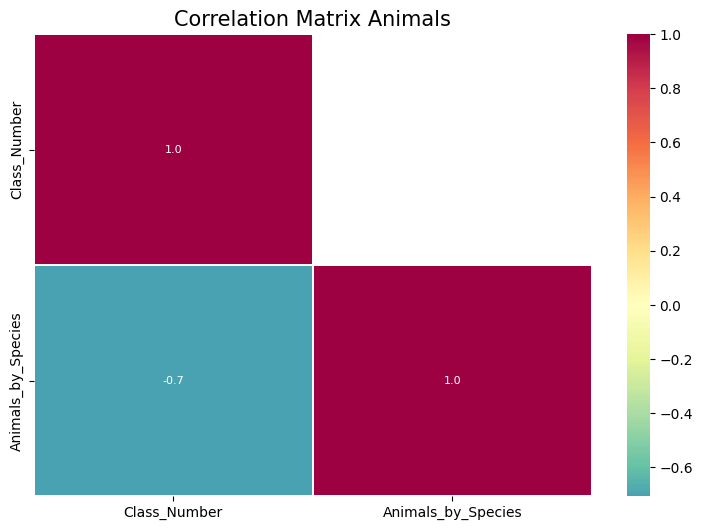

In [6]:
#Data correlation control - vers.1
ut.confusion_matrix(df_class)

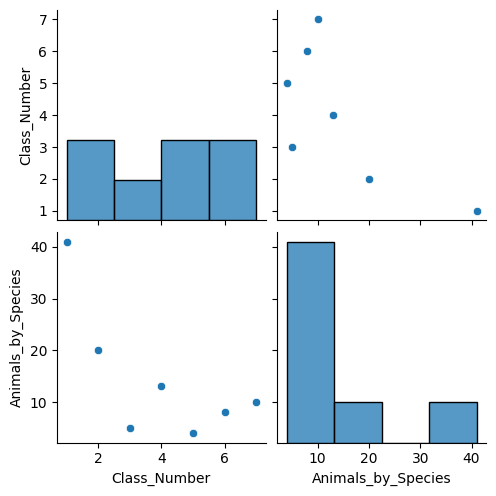

In [7]:
#Data correlation control - vers.2
sns.pairplot(df_class)

In [8]:
#Pie Graphic
fig = px.pie(df_class, values='Animals_by_Species', names='Class_Type', title='Animal Class Types Distribution', hole=0.40)
fig.show()

#### Osservazioni:
Questo dataframe servirà solo a valle dell'applicazione di ogni algoritmo. Da qui in avanti ci concentreremo sul dataframe principale zoo.csv

<div class="alert alert-info" style= "background-color:white; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:17px;'> 1b. File zoo.csv </h2>
</div>

In [9]:
ut.analisys("zoo.csv") #ATTENZIONE: eliminare "None" da statistiche di base e Analisi variabili

+----------+
|Nome File:|
+----------+
zoo.csv 

+-----------------------+
|Informazioni DataFrame:|
+-----------------------+
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null

#### Azioni:
Per analizzare il dataset, a partire da una conoscenza elementare della biologia, traduco i nomi delle feature e degli animali per capire se ci sono errori di coerenza tra l'animale e le sue caratteristiche

In [10]:
df_zoo = pd.read_csv("zoo.csv")

#init the Google translator
translator = Translator()

#create animal's name list
name_list = df_zoo.animal_name.values.tolist()

#translate every name in the first column of Data set
for index, name in enumerate(name_list):
    # traduco la parola
    translation = translator.translate(name, dest="it")
    translation_lowercase = translation.text.lower()
    # sostituisco il valore corrispondente nella prima colonna del dataframe
    df_zoo.at[index, 'animal_name'] = (f"{name} ({translation_lowercase})")
    

#create empty list
new_columns = []

#translate column headers
for col in df_zoo.columns:
    translation = translator.translate(col, dest="it")
    translation_lowercase = translation.text.lower()
    new_columns.append(f"{col} ({translation_lowercase})")
df_zoo.columns = new_columns

#View of modified Dataframe
print("Dataframe modificato:")
df_zoo.head(1)

Dataframe modificato:


animal_name (nome_animale)  hair (capelli)  feathers (piume)  eggs (uova)  \
0      aardvark (oritteropo)               1                 0            0   

   milk (latte)  airborne (aereo)  aquatic (acquatico)  predator (predatore)  \
0             1                 0                    0                     1   

   toothed (dentata)  backbone (spina dorsale)  breathes (respira)  \
0                  1                         1                   1   

   venomous (velenoso)  fins (a)  legs (gambe)  tail (coda)  \
0                    0         0             4            0   

   domestic (domestico)  catsize (catsize)  class_type (tipo_classe)  
0                     0                  1                         1

In [11]:
#change incorrect translations in columns name
df_zoo = df_zoo.rename(columns={
    'hair (capelli)': 'hair (pelliccia)',
    'airborne (aereo)': 'airborne (volante)',
    'toothed (dentata)':  'toothed (dentato)',
    'backbone (spina dorsale)': 'backbone (vertebrato)',
    'fins (a)': 'fins (pinne)',
    'legs (gambe)': 'legs (zampe)'
})
col_list = df_zoo.columns.tolist()
print(col_list)

['animal_name (nome_animale)', 'hair (pelliccia)', 'feathers (piume)', 'eggs (uova)', 'milk (latte)', 'airborne (volante)', 'aquatic (acquatico)', 'predator (predatore)', 'toothed (dentato)', 'backbone (vertebrato)', 'breathes (respira)', 'venomous (velenoso)', 'fins (pinne)', 'legs (zampe)', 'tail (coda)', 'domestic (domestico)', 'catsize (catsize)', 'class_type (tipo_classe)']


In [12]:
#check the data
name_list = df_zoo.iloc[:, 0].values.tolist()
print(name_list)

['aardvark (oritteropo)', 'antelope (antilope)', 'bass (basso)', 'bear (orso)', 'boar (cinghiale)', 'buffalo (bufalo)', 'calf (vitello)', 'carp (carpa)', 'catfish (pesce gatto)', 'cavy (cavia)', 'cheetah (ghepardo)', 'chicken (pollo)', 'chub (cavedano)', 'clam (mollusco)', 'crab (granchio)', 'crayfish (gambero)', 'crow (corvo)', 'deer (cervo)', 'dogfish (palombo)', 'dolphin (delfino)', 'dove (dove)', 'duck (anatra)', 'elephant (elefante)', 'flamingo (fenicottero)', 'flea (pulce)', 'frog (rana)', 'frog (rana)', 'fruitbat (volpe volante)', 'giraffe (giraffa)', 'girl (ragazza)', 'gnat (moscerino)', 'goat (capra)', 'gorilla (gorilla)', 'gull (gabbiano)', 'haddock (eglefino)', 'hamster (criceto)', 'hare (lepre)', 'hawk (falco)', 'herring (aringa)', 'honeybee (ape)', 'housefly (mosca domestica)', 'kiwi (kiwi)', 'ladybird (coccinella)', 'lark (allodola)', 'leopard (leopardo)', 'lion (leone)', 'lobster (aragosta)', 'lynx (lince)', 'mink (visone)', 'mole (neo)', 'mongoose (mangusta)', 'moth (fa

In [13]:
#change incorrect translations in animal's name
ut.update_animal_name(df_zoo, 'bass (basso)', 'bass (persico)')
ut.update_animal_name(df_zoo, 'chub (cavedano)', 'chub (pesce cavedano)')
ut.update_animal_name(df_zoo, 'dogfish (palombo)', 'dogfish (squalo)')
ut.update_animal_name(df_zoo, 'dove (dove)', 'dove (piccione)')
ut.update_animal_name(df_zoo, 'haddock (eglefino)', 'haddock (pesce eglefino)')
ut.update_animal_name(df_zoo, 'kiwi (kiwi)', 'kiwi (uccello kiwi)')
ut.update_animal_name(df_zoo, 'mole (neo)', 'mole (talpa)')
ut.update_animal_name(df_zoo, 'rhea (nandù)', 'rhea (uccello nandù)')
ut.update_animal_name(df_zoo, 'sealion (sigillatura)', 'sealion (leone marino)')
ut.update_animal_name(df_zoo, 'seawasp (seawasp)', 'seawasp (medusa)')
ut.update_animal_name(df_zoo, 'skimmer (skimmer)', 'skimmer (uccello skimmer)')
ut.update_animal_name(df_zoo, 'skua (skua)', 'skua (uccello skua)')
ut.update_animal_name(df_zoo, 'sole (sole)', 'sole (sogliola)')
ut.update_animal_name(df_zoo, 'vampire (vampiro)', 'vampire (pipistrello)')
ut.update_animal_name(df_zoo, 'vole (piacerebbe)', 'vole (roditore)')
ut.update_animal_name(df_zoo, 'wren (scricciolo)', 'wren (uccello scricciolo)')

Ho modificato 'bass (basso)' con 'bass (persico)'
Ho modificato 'chub (cavedano)' con 'chub (pesce cavedano)'
Ho modificato 'dogfish (palombo)' con 'dogfish (squalo)'
Ho modificato 'dove (dove)' con 'dove (piccione)'
Ho modificato 'haddock (eglefino)' con 'haddock (pesce eglefino)'
Ho modificato 'kiwi (kiwi)' con 'kiwi (uccello kiwi)'
Ho modificato 'mole (neo)' con 'mole (talpa)'
Ho modificato 'rhea (nandù)' con 'rhea (uccello nandù)'
Ho modificato 'sealion (sigillatura)' con 'sealion (leone marino)'
Nessun animale trovato che inizi con 'seawasp (seawasp)'
Ho modificato 'skimmer (skimmer)' con 'skimmer (uccello skimmer)'
Ho modificato 'skua (skua)' con 'skua (uccello skua)'
Ho modificato 'sole (sole)' con 'sole (sogliola)'
Ho modificato 'vampire (vampiro)' con 'vampire (pipistrello)'
Ho modificato 'vole (piacerebbe)' con 'vole (roditore)'
Ho modificato 'wren (scricciolo)' con 'wren (uccello scricciolo)'


In [14]:
df_zoo.head(3)

animal_name (nome_animale)  hair (pelliccia)  feathers (piume)  eggs (uova)  \
0      aardvark (oritteropo)                 1                 0            0   
1        antelope (antilope)                 1                 0            0   
2             bass (persico)                 0                 0            1   

   milk (latte)  airborne (volante)  aquatic (acquatico)  \
0             1                   0                    0   
1             1                   0                    0   
2             0                   0                    1   

   predator (predatore)  toothed (dentato)  backbone (vertebrato)  \
0                     1                  1                      1   
1                     0                  1                      1   
2                     1                  1                      1   

   breathes (respira)  venomous (velenoso)  fins (pinne)  legs (zampe)  \
0                   1                    0             0             4   
1                   1                    0             0             4   
2                   0                    0             1             0   

   tail (coda)  domestic (domestico)  catsize (catsize)  \
0            0                     0                  1   
1            1                     0                  1   
2            1                     0                  0   

   class_type (tipo_classe)  
0                         1  
1                         1  
2                         4

#### Azioni:
Prima di analizzare la coerenza tra l'animale e le sue caratteristiche, eliminiamo le colonne che creano rumore:
- domestic
- catsize

In [15]:
#delete noisy columns
df_zoo_cln = df_zoo.drop(['domestic (domestico)', 'catsize (catsize)'],axis=1)
df_zoo_cln.head(3)

animal_name (nome_animale)  hair (pelliccia)  feathers (piume)  eggs (uova)  \
0      aardvark (oritteropo)                 1                 0            0   
1        antelope (antilope)                 1                 0            0   
2             bass (persico)                 0                 0            1   

   milk (latte)  airborne (volante)  aquatic (acquatico)  \
0             1                   0                    0   
1             1                   0                    0   
2             0                   0                    1   

   predator (predatore)  toothed (dentato)  backbone (vertebrato)  \
0                     1                  1                      1   
1                     0                  1                      1   
2                     1                  1                      1   

   breathes (respira)  venomous (velenoso)  fins (pinne)  legs (zampe)  \
0                   1                    0             0             4   
1                   1                    0             0             4   
2                   0                    0             1             0   

   tail (coda)  class_type (tipo_classe)  
0            0                         1  
1            1                         1  
2            1                         4

#### Osservazioni:
Di norma i dataset sono di grandi dimensione e non è possibile verificare l'esattezza dei dati (ne compito del'analista farlo). In questo caso progetto però la numerosità dei dati lo consente e lo facciamo al fine di prendere dimestichezza con la manipolazione del dataset.


Dati errati da correggere con valore corretto da aggiornare:

--> campo = **eggs (uova)**
- seasnake (serpente di mare) depone uova (1)

</br> --> campo = **aquatic (acquatico)**
- clam (mollusco) è acquatico (1)

</br> --> campo = **predator (predatore)**
- boar (cinghiale) NON è un predatore (0)
- clam (mollusco) NON è un predatore (0)

</br> --> campo = **toothed (dentato)**
- carp (carpa) NON ha i denti (0)
- frog (rana) NON hanno denti (0)
- seahorse (cavalluccio marino) NON ha denti (0)

</br> --> campo = **fins (pinne)**
- sealion (leone marino) ha solo pinne (1)

</br> --> campo = **legs (zampe)**
- crab (granchio) ha 10 zampe e NON 4
- crayfish (gambero) ha 10 zampe e NON 6
- gorilla (gorilla) ha 4 zampe
- lobster (aragosta) ha 10 zampe e NON 6
- sealion (leone marino) NON ha zampe (0)
- wallaby (canguro) ha 4 zampe

</br> --> campo = **tail (coda)**
- aardvark (oritteropo) ha la coda (1)
- bear (orso) ha la coda (1)
- fruitbat (volpe volante) è un pipistrello quindi NON ha la coda (0)
- kiwi (uccello kiwi) NON ha la coda (0)
- lobster (aragosta) ha la coda (1)

</br> --> **valori duplicati** 
- ci sono 2 frog (rana), una velenosa, l'altra no - rinominarne una!

#### Azioni:
Procedo alla modifica dei valori errati colonna per colonna

In [16]:
#dictionary with the changes to be made
modifications = {
    'eggs (uova)': {'seasnake (serpente di mare)': 1},
    'aquatic (acquatico)': {'clam (mollusco)': 1},
    'predator (predatore)': {'boar (cinghiale)': 0, 'clam (mollusco)': 0},
    'toothed (dentato)': {'carp (carpa)': 0, 'frog (rana)': 0, 'seahorse (cavalluccio marino)': 0},
    'fins (pinne)': {'sealion (leone marino)': 1},
    'legs (zampe)': {'crab (granchio)': 10, 'crayfish (gambero)': 10, 'gorilla (gorilla)': 4, 'sealion (leone marino)': 0,'wallaby (canguro)': 4},
    'tail (coda)': {'aardvark (oritteropo)': 1, 'bear (orso)': 1, 'fruitbat (volpe volante)': 0, 'kiwi (uccello kiwi)': 0, 'lobster (aragosta)': 1}
}
#change errors in dataframe
for col, mod_dict in modifications.items():
    ut.modify_column(df_zoo_cln, 'animal_name (nome_animale)', col, mod_dict)

Fatto!
Fatto!
Fatto!
Fatto!
Fatto!
Fatto!
Fatto!
Fatto!
Fatto!
Fatto!
Fatto!
Fatto!
Fatto!
Fatto!
Fatto!
Fatto!
Fatto!
Fatto!


#### Azioni:
Cerco i nomi degli animali duplicati; ci dovrebbe essere solo la rana. (non si tratta di un record dupplicato: una rana è velenosa, l'altra no)

In [17]:
#extract animal_name colum
col_animal_name = 'animal_name (nome_animale)'
animal_names = df_zoo_cln[col_animal_name]

#search duplicate name and print
duplicated_animals = df_zoo_cln[animal_names.duplicated(keep=False)]
print(duplicated_animals[col_animal_name].unique())

['frog (rana)']


#### Azioni:
Cerchiamo la posizione di rana e rinominiamo una delle due.

In [18]:
#search position of rana
idx_rana = df_zoo_cln.index[df_zoo_cln['animal_name (nome_animale)'] == 'frog (rana)']
print(idx_rana)

Int64Index([25, 26], dtype='int64')


In [19]:
#change second rana in rana vel and check
df_zoo_cln.loc[26, 'animal_name (nome_animale)'] = 'frog2 (rana vel)'
df_zoo_cln.iloc[25:27]

animal_name (nome_animale)  hair (pelliccia)  feathers (piume)  \
25                frog (rana)                 0                 0   
26           frog2 (rana vel)                 0                 0   

    eggs (uova)  milk (latte)  airborne (volante)  aquatic (acquatico)  \
25            1             0                   0                    1   
26            1             0                   0                    1   

    predator (predatore)  toothed (dentato)  backbone (vertebrato)  \
25                     1                  0                      1   
26                     1                  0                      1   

    breathes (respira)  venomous (velenoso)  fins (pinne)  legs (zampe)  \
25                   1                    0             0             4   
26                   1                    1             0             4   

    tail (coda)  class_type (tipo_classe)  
25            0                         5  
26            0                         5

#### Azioni:
Esportiamo in csv il dataset pulito che utilizzeremo successivamente

In [20]:
#export to csv
df_zoo_cln.to_csv('zoo_cln.csv', index=False)
df_new = pd.read_csv('zoo_cln.csv')
df_new.head(3)

animal_name (nome_animale)  hair (pelliccia)  feathers (piume)  eggs (uova)  \
0      aardvark (oritteropo)                 1                 0            0   
1        antelope (antilope)                 1                 0            0   
2             bass (persico)                 0                 0            1   

   milk (latte)  airborne (volante)  aquatic (acquatico)  \
0             1                   0                    0   
1             1                   0                    0   
2             0                   0                    1   

   predator (predatore)  toothed (dentato)  backbone (vertebrato)  \
0                     1                  1                      1   
1                     0                  1                      1   
2                     1                  1                      1   

   breathes (respira)  venomous (velenoso)  fins (pinne)  legs (zampe)  \
0                   1                    0             0             4   
1                   1                    0             0             4   
2                   0                    0             1             0   

   tail (coda)  class_type (tipo_classe)  
0            1                         1  
1            1                         1  
2            1                         4

In [21]:
#delete also column class_type 
df_zoo_cln2 = df_zoo_cln.drop(['class_type (tipo_classe)'],axis=1)
df_zoo_cln2.head(3)

animal_name (nome_animale)  hair (pelliccia)  feathers (piume)  eggs (uova)  \
0      aardvark (oritteropo)                 1                 0            0   
1        antelope (antilope)                 1                 0            0   
2             bass (persico)                 0                 0            1   

   milk (latte)  airborne (volante)  aquatic (acquatico)  \
0             1                   0                    0   
1             1                   0                    0   
2             0                   0                    1   

   predator (predatore)  toothed (dentato)  backbone (vertebrato)  \
0                     1                  1                      1   
1                     0                  1                      1   
2                     1                  1                      1   

   breathes (respira)  venomous (velenoso)  fins (pinne)  legs (zampe)  \
0                   1                    0             0             4   
1                   1                    0             0             4   
2                   0                    0             1             0   

   tail (coda)  
0            1  
1            1  
2            1

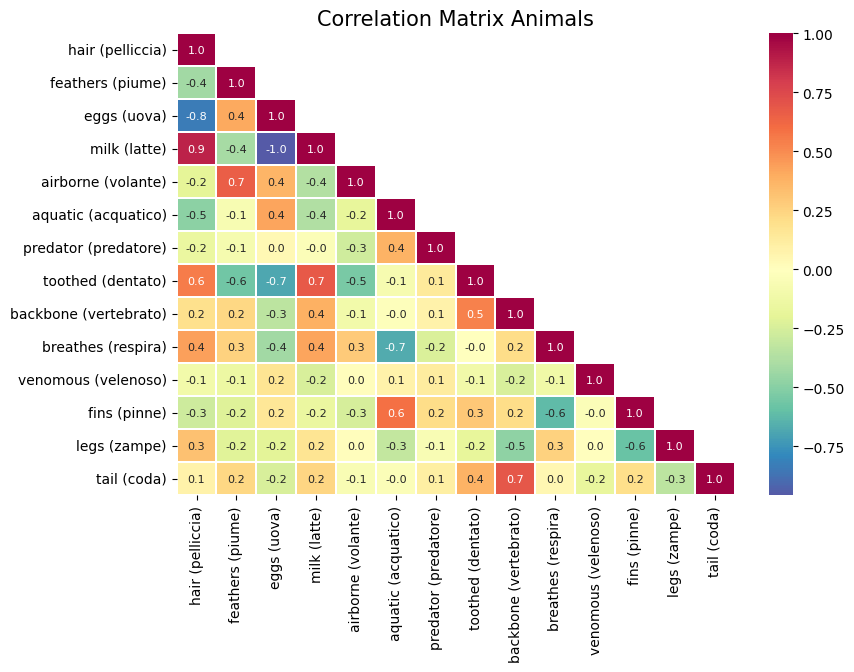

In [22]:
#Data correlation control
df_zoo = pd.read_csv("zoo.csv")
ut.confusion_matrix(df_zoo_cln2)

#### Osservazioni:
Dalla correlation matrix emerge che ci sono 8 coppie di feautures strettamente correlate (valori da -0,9 a 0,9):
- eggs-hair (-0,8)
- toothed-eggs (-0,7)
- breathers-aquatic (-0,7)
- milk-eggs (-1,0)
- airborne-feathers (0,7)
- toothed-milk (0,7)
- tail-backbone (0,7)
- milk-hair (0,9)


ATTENZIONE: cercare di automatizzare in qualche modo la presa dei valori maggiori!!!!

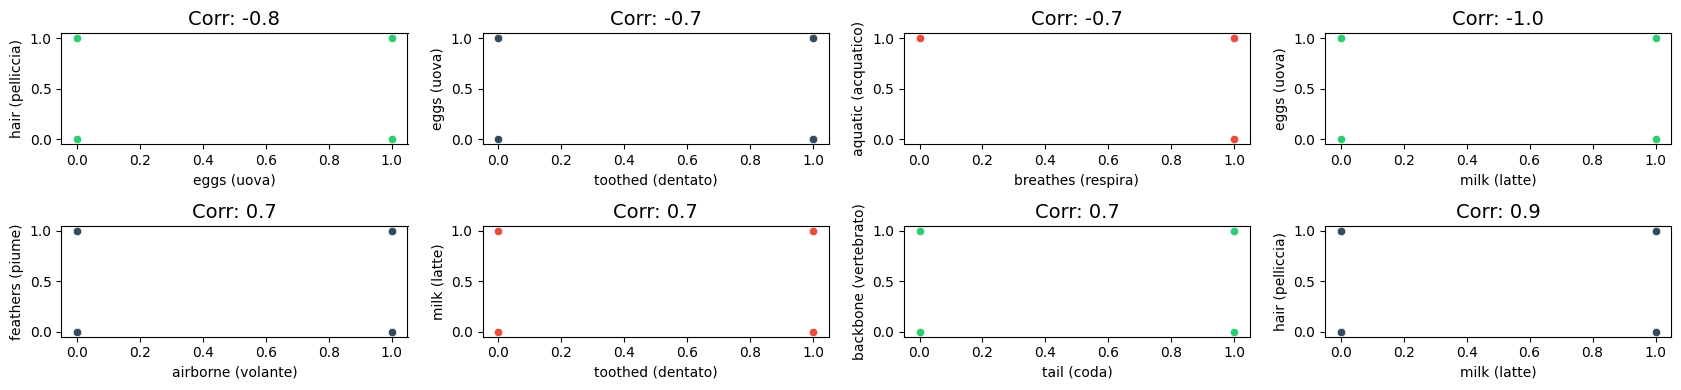

In [23]:
#Graphic representations of eight pairs with the highest correlation
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots( 2, 4, figsize = (17,4) )
sns.scatterplot(x="eggs (uova)", y="hair (pelliccia)", data= df_zoo_cln2, ax = ax1, color = "#2ecc71").set_title("Corr: -0.8", fontsize = 14)
sns.scatterplot(x="toothed (dentato)", y="eggs (uova)", data = df_zoo_cln2, ax = ax2, color = "#34495e").set_title("Corr: -0.7", fontsize = 14)
sns.scatterplot(x="breathes (respira)", y="aquatic (acquatico)", data = df_zoo_cln2, ax = ax3, color = "#e74c3c").set_title("Corr: -0.7", fontsize = 14)
sns.scatterplot(x="milk (latte)", y="eggs (uova)", data = df_zoo_cln2, ax = ax4, color = "#2ecc71", ).set_title("Corr: -1.0", fontsize = 14)
sns.scatterplot(x="airborne (volante)", y="feathers (piume)", data = df_zoo_cln2, ax = ax5, color = "#34495e", ).set_title("Corr: 0.7", fontsize = 14)
sns.scatterplot(x="toothed (dentato)", y="milk (latte)", data = df_zoo_cln2, ax = ax6, color = "#e74c3c", ).set_title("Corr: 0.7", fontsize = 14)
sns.scatterplot(x="tail (coda)", y="backbone (vertebrato)", data = df_zoo_cln2, ax = ax7, color = "#2ecc71", ).set_title("Corr: 0.7", fontsize = 14)
sns.scatterplot(x="milk (latte)", y="hair (pelliccia)", data = df_zoo_cln2, ax = ax8, color = "#34495e", ).set_title("Corr: 0.9", fontsize = 14)
plt.tight_layout()
plt.show()

#### Osservazioni:
La natura binaria dei dati impedisce una rappresentazione grafica significativa


SPIEGARE MEGLIO IL GRAFICO

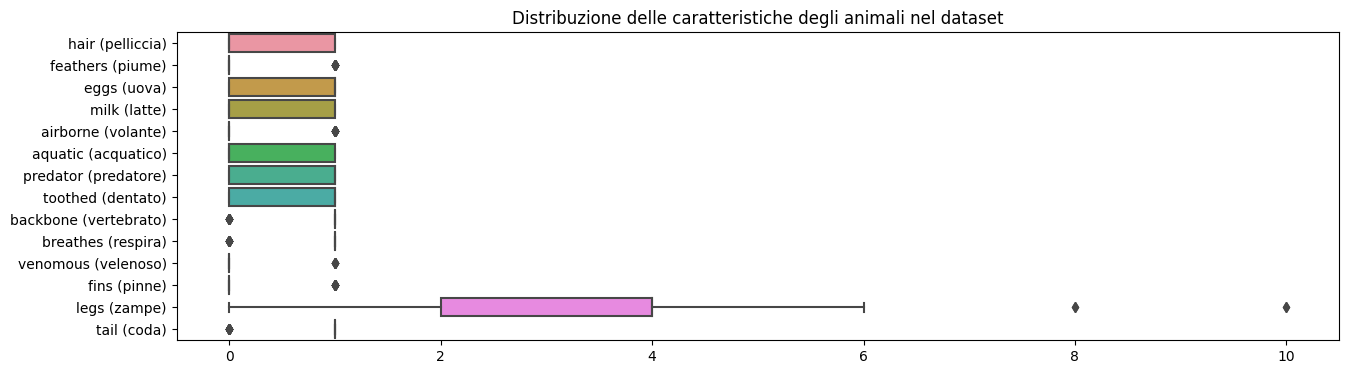

In [24]:
#Graphic representations of animal's values
plt.figure(figsize = (15,4))
sns.boxplot(data = df_zoo_cln2, orient = "h")
plt.title("Distribuzione delle caratteristiche degli animali nel dataset")
plt.show()

#### Osservazioni:
Il grafico boxplot rappresenta chiaramente la distribuzione dei dati numerici delle features. L'unica caratteristica che si discosta in modo considerevole dalle altre, non essendo binaria, è legs

COSA RAPPRESENTANO I DATI SENZA COLORE MA SOLO CON I ROMBI E LA LINEA

In [25]:
#Group by legs and fins
gruppi = df_new.groupby(['legs (zampe)', 'fins (pinne)'])

for num, (nome, gruppo) in enumerate(gruppi):
    print('Gruppo', num+1)
    for index, row in gruppo.iterrows():
        if row['legs (zampe)'] > 0:
            print('',row["animal_name (nome_animale)"],"zampe (",row["legs (zampe)"],")")
        else:
            print('',row["animal_name (nome_animale)"],"pinne (",row["fins (pinne)"],")")
    print('Totale:', len(gruppo),'\n')

Gruppo 1
 clam (mollusco) pinne ( 0 )
 pitviper (vipera) pinne ( 0 )
 seasnake (serpente di mare) pinne ( 0 )
 seawasp (vespa marina) pinne ( 0 )
 slowworm (orbettino) pinne ( 0 )
 slug (lumaca) pinne ( 0 )
 worm (verme) pinne ( 0 )
Totale: 7 

Gruppo 2
 bass (persico) pinne ( 1 )
 carp (carpa) pinne ( 1 )
 catfish (pesce gatto) pinne ( 1 )
 chub (pesce cavedano) pinne ( 1 )
 dogfish (squalo) pinne ( 1 )
 dolphin (delfino) pinne ( 1 )
 haddock (pesce eglefino) pinne ( 1 )
 herring (aringa) pinne ( 1 )
 pike (luccio) pinne ( 1 )
 piranha (piranha) pinne ( 1 )
 porpoise (focena) pinne ( 1 )
 seahorse (cavalluccio marino) pinne ( 1 )
 seal (foca) pinne ( 1 )
 sealion (leone marino) pinne ( 1 )
 sole (sogliola) pinne ( 1 )
 stingray (razza) pinne ( 1 )
 tuna (tonno) pinne ( 1 )
Totale: 17 

Gruppo 3
 chicken (pollo) zampe ( 2 )
 crow (corvo) zampe ( 2 )
 dove (piccione) zampe ( 2 )
 duck (anatra) zampe ( 2 )
 flamingo (fenicottero) zampe ( 2 )
 fruitbat (volpe volante) zampe ( 2 )
 girl (r

#### Osservazioni:
Utilizzando il group by sulle caratteristiche zampe e pinne abbiamo un primo risultato interessante che ha come risultato, seppur approssimativo, un numero di gruppi molto simile al file class.csv.


FARE CLISTERING SU QUESTE DUE FEATURES

<div class="alert alert-info" style="background-color:LightGree; color:black; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:25px; text-decoration: underline'> 2. Applicazione degli algoritmi di clustering </h2>
</div>

#### Azioni:
Applicheremo, in sequenza, i tre principali algoritmi dell'apprendimento non supervisionato:

1 - **K-Means**

2 - **Clustering gerarchico**

3 - **DBScan**


SPECIFICARE LA DIFFERENZA TRA I TRE

<div class="alert alert-info" style= "background-color:white; color:red; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:20px;'> L'algoritmo K-Means </h2>
</div>

#### Osservazioni:
Assegna i punti in base alla distanza dal centroide

In [26]:
#delete column class_type for have neutral data
df_new = pd.read_csv('zoo_cln.csv')
df_new2 = df_new.drop(['class_type (tipo_classe)'],axis=1)

In [27]:
df_new2.head(1)

animal_name (nome_animale)  hair (pelliccia)  feathers (piume)  eggs (uova)  \
0      aardvark (oritteropo)                 1                 0            0   

   milk (latte)  airborne (volante)  aquatic (acquatico)  \
0             1                   0                    0   

   predator (predatore)  toothed (dentato)  backbone (vertebrato)  \
0                     1                  1                      1   

   breathes (respira)  venomous (velenoso)  fins (pinne)  legs (zampe)  \
0                   1                    0             0             4   

   tail (coda)  
0            1

In [28]:
X = df_new2.iloc[:, 1:16].values  #select columns from 2 to 17 like features matrix X
y = df_new2.iloc[:, -2].values  #select legs column like target y ATTENZIONE!!!
n_samples, n_features = X.shape
n_features, n_samples

(14, 101)

In [29]:
#with TSNE we reduces complexity by taking space from 14 dimensions to 2 for graphical representation
from sklearn.manifold import TSNE
X = TSNE(
        n_components=2,
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ).fit_transform(X)

#### Osservazioni:
I valori della variabile X sono stati sostituiti con le *nuove coordinate bidimensionali*, calcolate dall'algoritmo t-SNE per rappresentare i dati in uno spazio a due dimensioni, quindi X non rappresenta più il dataset originale ma la sua rappresentazione a due dimensioni ottenuta dall'algoritmo t-SNE.
I valori di y invece sono rapprensentati dal numero di zampe. 

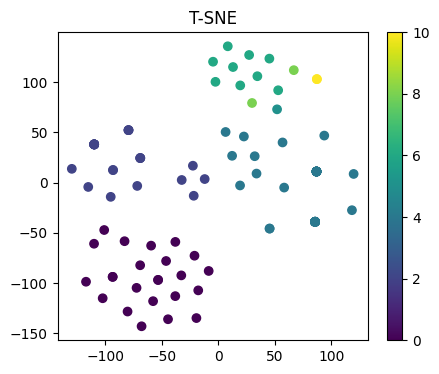

In [113]:
#T'SNE graphic
fig = plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], c=y) #prende i valori di y (da 0 a 10) e li trasforma in altrettante gradazioni
plt.title('T-SNE')
plt.colorbar()
plt.show()

I DATI SONO RAGGRUPPABILI

#### Osservazioni:
Inizializzazione causale dei centroidi 

**Centroidi** = punti geometrici che rappresentano il centro di massa di un cluster

**Cluster** = insiemi di punti simili che vengono raggruppati insieme dall'algoritmo di clustering

In [31]:
#K-Means - init 'random'
km_clustering = KMeans(n_clusters = 7,  #7 clusters
            init= 'random',  # random initialization
            n_init= 10, # number of re-iterations
            max_iter= 300, # max number of iteration per run
            tol= 1e-4, # minimum increase 10^(-4)
            random_state=0)
y_km_clustering = km_clustering.fit_predict(X)
print(y_km_clustering[:10]) # First 10 clusterized points - id group
np.unique(y_km_clustering)

[0 5 6 0 5 5 5 6 6 5]


array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [241]:
#CREA DEF PER TIRARE FUORI ANIMALI CLUSTERING (CIOE' CON I PROX 2 BLOCCHI)

In [203]:
#find animal's name inside each cluster
results = []
for index, a in enumerate(X):
    results.append('{},{}'.format(df_new2.loc[index,'animal_name (nome_animale)'], y_km_clustering[index]))
#print(results)

In [220]:
#tuple lists with data split in name e cluster
new_list = [tuple(x.split(",")) for x in results]

#newdf with 2 coloums
df_cl = pd.DataFrame(new_list, columns=['Animal', 'Clusters'])

#animal in every cluster
group_cl = df_cl.groupby(['Clusters'])
print('Algoritmo... (SPECIFICA QUALE CON VARIABILE)\n')
for num, (nome, gruppo) in enumerate(group_cl):
    print('Cluster', num+0)
    animali = list(gruppo['Animal'])
    for x in animali:
        print(x)
    print('Totale:', len(gruppo),'\n')   

Algoritmo... (SPECIFICA QUALE CON VARIABILE)

Cluster 0
aardvark (oritteropo)
bear (orso)
cheetah (ghepardo)
leopard (leopardo)
lion (leone)
lynx (lince)
mink (visone)
mole (talpa)
mongoose (mangusta)
opossum (opossum)
platypus (ornitorinco)
polecat (puzzola)
puma (puma)
pussycat (micio)
raccoon (procione)
wolf (lupo)
Totale: 16 

Cluster 1
chicken (pollo)
crow (corvo)
dove (piccione)
duck (anatra)
flamingo (fenicottero)
gull (gabbiano)
hawk (falco)
kiwi (uccello kiwi)
lark (allodola)
ostrich (struzzo)
parakeet (parrocchetto)
penguin (pinguino)
pheasant (fagiano)
rhea (uccello nandù)
skimmer (uccello skimmer)
skua (uccello skua)
sparrow (passero)
swan (cigno)
vulture (avvoltoio)
wren (uccello scricciolo)
Totale: 20 

Cluster 2
frog (rana)
frog2 (rana vel)
fruitbat (volpe volante)
girl (ragazza)
newt (tritone)
squirrel (scoiattolo)
toad (rospo)
tortoise (tartaruga)
tuatara (tuatara)
vampire (pipistrello)
Totale: 10 

Cluster 3
chub (pesce cavedano)
clam (mollusco)
dolphin (delfino)
hadd

In [207]:
#def graphic da SPOSTARE IN UTILS.PY
def plot_clustering(X, labels, centroids, ax=None):
    #_, ax = plt.subplots()
    for label in np.unique(labels):
        ax.scatter(
            *X[labels == label].T,
            marker='o',
            s=60,
            color=plt.cm.tab10(label),
            alpha=0.8
        )
    if len(centroids) > 0:
        ax.scatter(centroids[:,0],centroids[:,1],
            s=250, marker='*',
            c='yellow', edgecolor='red',
            label='Centroidi'
        )
    ax.legend()

In [61]:
#plot_clustering(X,y_km_clustering, km_clustering.cluster_centers_)
#plt.title('K-Mean (inizializzazione casuale)')

#### Osservazioni:
kmeans ++ definisce tante inizializzazioni e seleziona quella che massimizza l'inerzia 

In [208]:
#K-Means - init 'k-means++'
kmplus_clustering = KMeans(n_clusters=7, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_kmplus_clustering = kmplus_clustering.fit_predict(X)

In [209]:
#plot_clustering(X,y_kmplus_clustering, kmplus_clustering.cluster_centers_)
#plt.title('K-Mean (inizializzazione k-means++)')

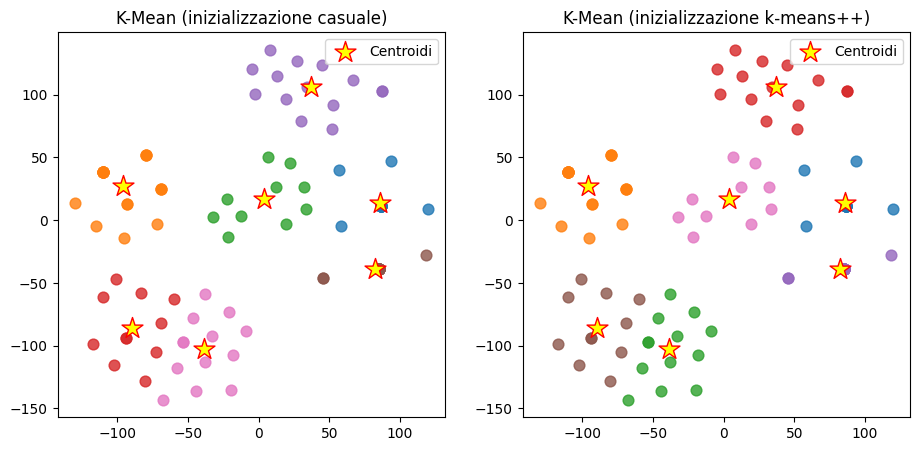

In [210]:
#show K-Mean init random Vs. K-Mean init K-Mean++
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(11, 5))

# chiama la funzione plot_clustering per ciascun grafico
plot_clustering(X, y_km_clustering, km_clustering.cluster_centers_, ax1)
plot_clustering(X, y_kmplus_clustering, kmplus_clustering.cluster_centers_, ax2)

# imposta i titoli dei grafici
ax1.set_title('K-Mean (inizializzazione casuale)')
ax2.set_title('K-Mean (inizializzazione k-means++)')

# mostra la figura
plt.show()

#### Osservazioni:
Il risultato delle due differenti inizializzazioni è uguale.

Impostando il numero di clusters a 7, per poter fare il confronto con il file finale class, notiamo che il numero di clusters sembra inferiore. Il colore rosso e rosa potrebbero essere un unico gruppo e non due; cosi come il colore marrone potrebbe essere assimilato dal gruppo dei punti blu.

In [64]:
print('Inertia: %.2f' % kmplus_clustering.inertia_)

Inertia: 69816.38


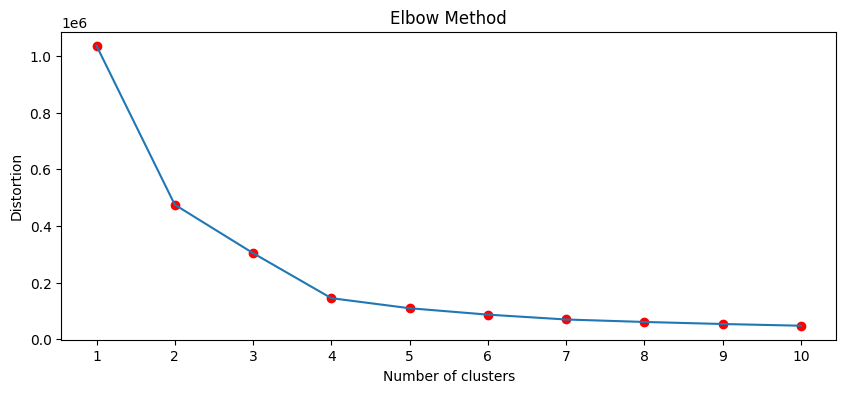

In [65]:
#Elbow Method
inertias = []
for i in np.arange(1,11):
    km = KMeans(n_clusters= i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    inertias.append(km.inertia_)

#plotting inertias values
plt.figure(1 , figsize = (10 ,4))
plt.plot(np.arange(1,11),inertias)
plt.scatter(np.arange(1,11),inertias, color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.xticks(np.arange(1,11))
#plt.grid(True)
plt.show()

#### Osservazioni:
Il metodo suggerisce sommariamento il numero ottimale di clusters, in questo caso pari a 4

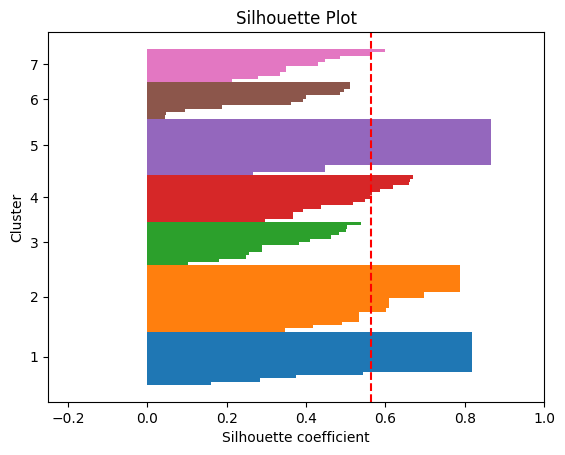

In [66]:
#Silhouette score
cluster_labels = np.unique(kmplus_clustering.labels_) #array of labels
n_clusters =  len(cluster_labels) #number of clusters
silhouette_vals =  silhouette_samples(X, kmplus_clustering.labels_, metric='euclidean')# silhoutte for each sample
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels): #for each cluster
    c_silhouette_vals = silhouette_vals[y_kmplus_clustering == c] #get the s(i) for samples of cluster c
    c_silhouette_vals.sort() #sort in-place the s(i)
    y_ax_upper += len(c_silhouette_vals)
    color = plt.cm.tab10(c)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.title('Silhouette Plot')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.xlim((-0.25,1))

plt.show()

#### Osservazioni:
Il coefficiente di sagoma può variare tra –1 e +1. 

Un coefficiente vicino a:
- +1 significa che l'istanza è ben all'interno del proprio cluster e lontana da altri cluster
- 0 significa che è vicina a un bordo del cluster
- -1 significa che l'istanza potrebbe essere stato assegnato al cluster sbagliato

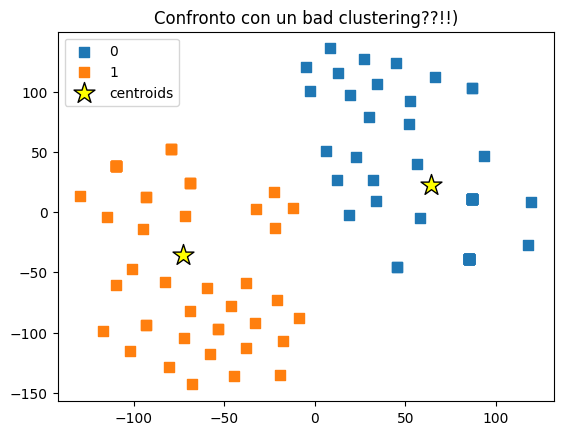

In [95]:
#confronto con il clustering cattivo???
num_clusters = 2
km_bad = KMeans(n_clusters= num_clusters,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km_bad = km_bad.fit_predict(X)

for i, c in enumerate(np.unique(km_bad.labels_)):
    plt.scatter(X[y_km_bad == c, 0],
            X[y_km_bad == c, 1],
            s=50,
            color=plt.cm.tab10(c),
            marker='s',
            label=str(c))
plt.title('Confronto con un bad clustering??!!)')

plt.scatter(km_bad.cluster_centers_[:, 0], km_bad.cluster_centers_[:, 1],
            s=250, marker='*', color='yellow', edgecolor='black', label='centroids')
plt.legend()

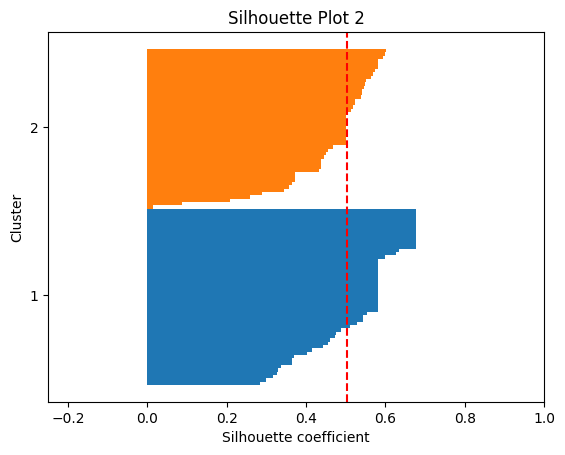

In [72]:
cluster_labels = np.unique(y_km_bad)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km_bad, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km_bad == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = plt.cm.tab10(c)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.title('Silhouette Plot 2')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.xlim((-0.25,1))

plt.show()

<div class="alert alert-info" style= "background-color:white; color:blue; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:20px;'> Il Clustering gerarchico </h2>
</div>

In [228]:
#use cleaned file created before
df_new = pd.read_csv('zoo_cln.csv')
df_new2 = df_new.drop(['class_type (tipo_classe)'],axis=1)
df_new2.head(1)

animal_name (nome_animale)  hair (pelliccia)  feathers (piume)  eggs (uova)  \
0      aardvark (oritteropo)                 1                 0            0   

   milk (latte)  airborne (volante)  aquatic (acquatico)  \
0             1                   0                    0   

   predator (predatore)  toothed (dentato)  backbone (vertebrato)  \
0                     1                  1                      1   

   breathes (respira)  venomous (velenoso)  fins (pinne)  legs (zampe)  \
0                   1                    0             0             4   

   tail (coda)  
0            1

In [245]:
Xg = df_new2.iloc[:, 1:16].values  #select columns from 2 to 17 like features matrix X

In [ ]:
#CREA DEF PER TSNE!!!

In [246]:
from sklearn.manifold import TSNE
Xag = TSNE(
        n_components=2,
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ).fit_transform(Xg)

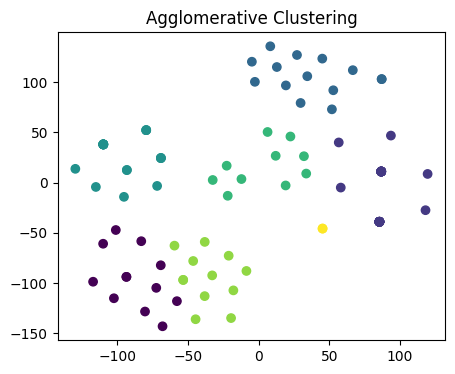

In [247]:
#features
#X = df_new2[['legs (zampe)', 'fins (pinne)']].values

ac = AgglomerativeClustering(n_clusters=7, #how many clusters
                             affinity='euclidean', #which distance
                             linkage='complete' # merging strategy
                            )
y_ac_blob = ac.fit_predict(Xag)

#scatter plot
fig = plt.figure(figsize=(5, 4))
plt.scatter(Xag[:, 0], Xag[:, 1], c=y_ac_blob)
#plt.xlabel('legs')
#plt.ylabel('fins')
plt.title('Agglomerative Clustering')
plt.show()

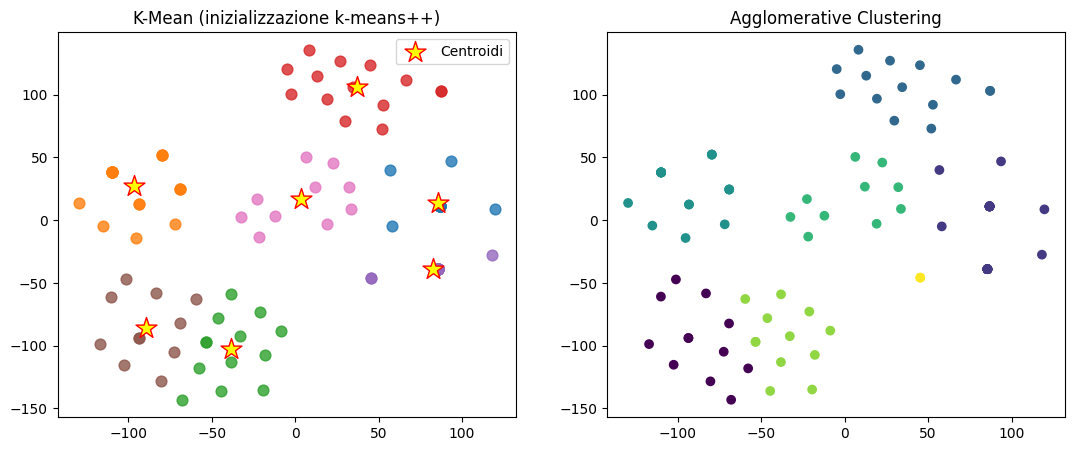

In [248]:
#show K-Mean init random Vs. K-Mean init K-Mean++
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13, 5))

# chiama la funzione plot_clustering per ciascun grafico
plot_clustering(X, y_kmplus_clustering, kmplus_clustering.cluster_centers_, ax1)
plt.scatter(Xag[:, 0], Xag[:, 1], c=y_ac_blob)

# imposta i titoli dei grafici
ax1.set_title('K-Mean (inizializzazione k-means++)')
ax2.set_title('Agglomerative Clustering')

# mostra la figura
plt.show()

#### Osservazioni:
Dal confronto emerge una leggera differenza tra divisione dei due gruppi in basso a sinistra. Mentre K-Means assegna più punti al cluster verde, l'agglomerative cluster li divide perfettamente a metà 

In [241]:
#CREA DEF PER TIRARE FUORI ANIMALI CLUSTERING (CIOE' CON I PROX 2 BLOCCHI)

In [249]:
#find animal's name inside each cluster
results = []
for index, a in enumerate(Xag):
    results.append('{},{}'.format(df_new2.loc[index,'animal_name (nome_animale)'], y_ac_blob[index]))
#print(results)

In [250]:
#tuple lists with data split in name e cluster
new_list = [tuple(x.split(",")) for x in results]

#newdf with 2 coloums
df_cl = pd.DataFrame(new_list, columns=['Animal', 'Clusters'])

#animal in every cluster
group_cl = df_cl.groupby(['Clusters'])
print('Algoritmo... (SPECIFICA QUALE CON VARIABILE)\n')
for num, (nome, gruppo) in enumerate(group_cl):
    print('Cluster', num+0)
    animali = list(gruppo['Animal'])
    for x in animali:
        print(x)
    print('Totale:', len(gruppo),'\n')   

Algoritmo... (SPECIFICA QUALE CON VARIABILE)

Cluster 0
chub (pesce cavedano)
clam (mollusco)
dolphin (delfino)
piranha (piranha)
pitviper (vipera)
porpoise (focena)
seal (foca)
sealion (leone marino)
slowworm (orbettino)
slug (lumaca)
tuna (tonno)
worm (verme)
Totale: 12 

Cluster 1
aardvark (oritteropo)
antelope (antilope)
bear (orso)
boar (cinghiale)
buffalo (bufalo)
calf (vitello)
cheetah (ghepardo)
deer (cervo)
elephant (elefante)
giraffe (giraffa)
goat (capra)
hamster (criceto)
hare (lepre)
leopard (leopardo)
lion (leone)
lynx (lince)
mink (visone)
mole (talpa)
mongoose (mangusta)
opossum (opossum)
oryx (orice)
platypus (ornitorinco)
polecat (puzzola)
pony (pony)
puma (puma)
pussycat (micio)
raccoon (procione)
reindeer (renna)
vole (roditore)
wallaby (canguro)
wolf (lupo)
Totale: 31 

Cluster 2
crab (granchio)
crayfish (gambero)
flea (pulce)
gnat (moscerino)
honeybee (ape)
housefly (mosca domestica)
ladybird (coccinella)
lobster (aragosta)
moth (falena)
octopus (polpo)
scorpion (

In [107]:
#toy example to show how children_works------------A COSA SERVE??? (ESEMPIO DEL PROF)
test = np.array([1,2,4,15,17,20]).reshape(-1,1)
test_ac = AgglomerativeClustering(n_clusters=2,
                                 affinity='euclidean',
                                 linkage='complete')
test_ac.fit(test)
test_ac.children_

array([[0, 1],
       [3, 4],
       [2, 6],
       [5, 7],
       [8, 9]])

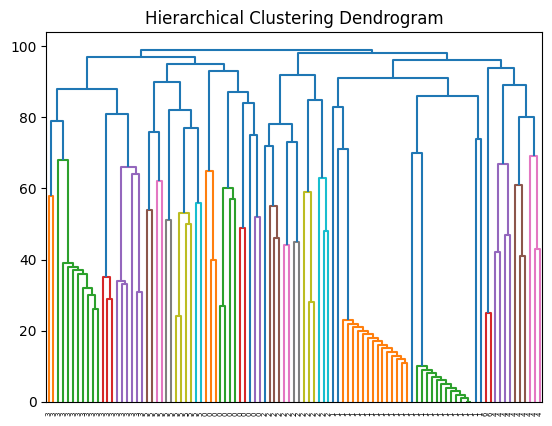

In [108]:
def plot_dendrogram(model, **kwargs):
    children = model.children_
    distance = np.arange(children.shape[0])
    no_of_observations = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(ac, labels=ac.labels_)
plt.show()

<div class="alert alert-info" style= "background-color:white; color:orange; padding:0px 5px; border-radius:15px">
    <h2 style='margin:10px 5px; font-size:20px;'> Il DBScan </h2>
</div>

In [268]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [269]:
df_new = pd.read_csv('zoo_cln.csv')
df_new2 = df_new.drop(['class_type (tipo_classe)'],axis=1)
Xdb = df_new2.iloc[:, 1:16].values  #select columns from 2 to 17 like features matrix X

In [270]:
#CREA DEF PER TSNE!!!

In [271]:
X_zoo = TSNE(
        n_components=2,
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ).fit_transform(Xdb)
Xsc = np.array(X_zoo)

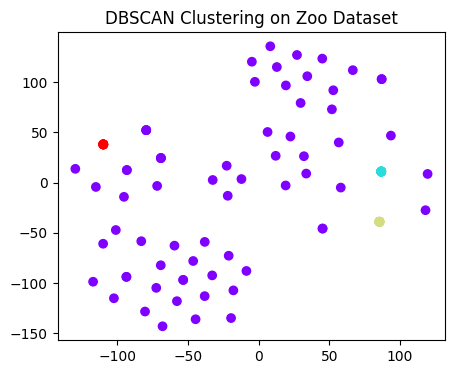

In [272]:
# Seleziona i parametri dell'algoritmo DBSCAN
eps = 0.5
min_samples = 5

# Applica l'algoritmo DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
labels = dbscan.fit_predict(Xsc)

# Crea il grafico a dispersione
fig = plt.figure(figsize=(5, 4))
plt.scatter(Xsc[:, 0], Xsc[:, 1], c=labels, cmap='rainbow')
#plt.xlabel('Prima Componente Principale')
#plt.ylabel('Seconda Componente Principale')
plt.title('DBSCAN Clustering on Zoo Dataset')
plt.show()

In [273]:
#utilizza la stima della densità 

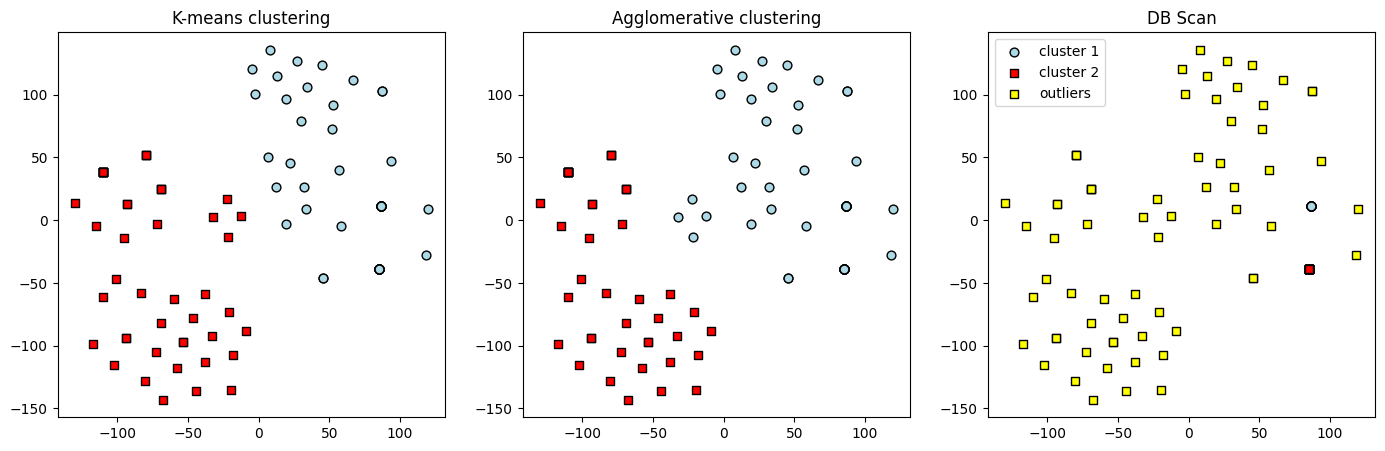

In [274]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5))

#ax1
km_animal = KMeans(n_clusters=2, random_state=0)
y_kmplus_clustering = km_animal.fit_predict(X)

ax1.scatter(X[y_kmplus_clustering == 0, 0], X[y_kmplus_clustering == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_kmplus_clustering == 1, 0], X[y_kmplus_clustering == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

#ax2
ac_animal = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac_blob = ac_animal.fit_predict(Xag) 

ax2.scatter(Xag[y_ac_blob == 0, 0], Xag[y_ac_blob == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(Xag[y_ac_blob == 1, 0], Xag[y_ac_blob == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')


#ax3
db_animal = DBSCAN(eps= 0.5, min_samples= 5, metric='euclidean')
y_db_animal = db_animal.fit_predict(Xsc)

ax3.scatter(Xsc[y_db_animal == 0, 0], Xsc[y_db_animal == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
ax3.scatter(Xsc[y_db_animal == 1, 0], Xsc[y_db_animal == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
ax3.scatter(Xsc[y_db_animal == -1, 0], Xsc[y_db_animal == -1, 1],
            c='yellow', marker='s', s=40,
            edgecolor='black', 
            label='outliers')
ax3.set_title('DB Scan')


plt.legend()
plt.show()

In [241]:
#CREA DEF PER TIRARE FUORI ANIMALI CLUSTERING (CIOE' CON I PROX 2 BLOCCHI)

In [275]:
#find animal's name inside each cluster
results = []
for index, a in enumerate(Xg):
    results.append('{},{}'.format(df_new2.loc[index,'animal_name (nome_animale)'], y_db_animal[index]))
#print(results)

In [276]:
#tuple lists with data split in name e cluster
new_list = [tuple(x.split(",")) for x in results]

#newdf with 2 coloums
df_cl = pd.DataFrame(new_list, columns=['Animal', 'Clusters'])

#animal in every cluster
group_cl = df_cl.groupby(['Clusters'])
print('Algoritmo... (SPECIFICA QUALE CON VARIABILE)\n')
for num, (nome, gruppo) in enumerate(group_cl):
    print('Cluster', num+0)
    animali = list(gruppo['Animal'])
    for x in animali:
        print(x)
    print('Totale:', len(gruppo),'\n')   

Algoritmo... (SPECIFICA QUALE CON VARIABILE)

Cluster 0
aardvark (oritteropo)
antelope (antilope)
bass (persico)
carp (carpa)
catfish (pesce gatto)
cavy (cavia)
chub (pesce cavedano)
clam (mollusco)
crab (granchio)
crayfish (gambero)
crow (corvo)
dogfish (squalo)
dolphin (delfino)
duck (anatra)
flea (pulce)
frog (rana)
frog2 (rana vel)
fruitbat (volpe volante)
girl (ragazza)
gnat (moscerino)
gorilla (gorilla)
gull (gabbiano)
haddock (pesce eglefino)
hawk (falco)
herring (aringa)
honeybee (ape)
housefly (mosca domestica)
kiwi (uccello kiwi)
ladybird (coccinella)
lobster (aragosta)
mink (visone)
moth (falena)
newt (tritone)
octopus (polpo)
ostrich (struzzo)
penguin (pinguino)
pike (luccio)
piranha (piranha)
pitviper (vipera)
platypus (ornitorinco)
porpoise (focena)
rhea (uccello nandù)
scorpion (scorpione)
seahorse (cavalluccio marino)
seal (foca)
sealion (leone marino)
seasnake (serpente di mare)
seawasp (vespa marina)
skimmer (uccello skimmer)
skua (uccello skua)
slowworm (orbettino)
s

In [165]:
from sklearn.neighbors import NearestNeighbors
import matplotlib as mp

In [156]:
nbrs = NearestNeighbors(n_neighbors=4, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [157]:
four_distances = np.sort(distances[:,-1])

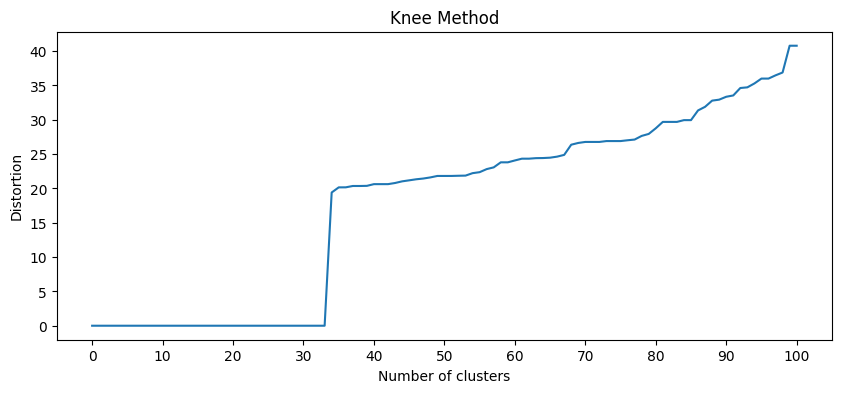

In [188]:
#plotting knee
plt.figure(1, figsize=(10, 4))
plt.plot(np.arange(len(four_distances)), four_distances)
plt.title('Knee Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.xticks(np.arange(0, len(four_distances), 10))
plt.show()

In [189]:
dbscan = DBSCAN(eps=2, min_samples=4, metric='euclidean')
dbscan.fit(X)

DBSCAN(eps=2, min_samples=4)

In [190]:
def plot_clustering_dbscan(X, labels):
    _, ax = plt.subplots()
    norm = mp.colors.Normalize(vmin=0, vmax=np.max(labels)+1)
    print(len(np.unique(labels)))
    for indx, label in enumerate(np.unique(labels)):
        if label >= 0:
            ax.scatter(
                *X[labels == label].T,
                marker='o',#f"${digit}$"'',
                s=60,
                color=plt.cm.Spectral(norm(label)),
                alpha=0.8
            )
        else:
            ax.scatter(
                *X[labels == label].T,
                marker='*',#f"${digit}$"'',
                s=60,
                color='black',
                alpha=0.8
            )

4


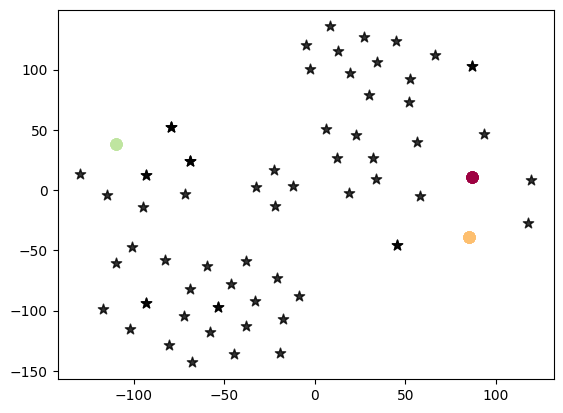

In [170]:
plot_clustering_dbscan(X, dbscan.labels_)

In [ ]:
#create new coloum with progressive numbers for have a numerica primary key 
#df_new2['Progressivo'] = range(1, len(df_new) + 1)

# ROBA VECCHIA ------------------------------------------------->

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Prepara il set di dati
df_new = pd.read_csv('zoo_cln.csv')
X_zoo = df_new.iloc[:, 1:].values #tutto tranne la prima colonna
X = np.array(X_zoo)

# Riduci la dimensionalità dei dati con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Seleziona i parametri dell'algoritmo DBSCAN
eps = 0.5
min_samples = 5

# Applica l'algoritmo DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_pca)

# Crea il grafico a dispersione
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Prima Componente Principale')
plt.ylabel('Seconda Componente Principale')
plt.title('Grafico a Dispersione dei Dati con Etichette di Cluster (DBSCAN)')
plt.show()

In [ ]:
# Search for the most relevant columns with Chi-Squared Test

from scipy.stats import chi2_contingency

# carica il dataset
data = df_noaname

# itera su tutte le possibili coppie di attributi
#risultato = "" #stringa vuota
for i, col1 in enumerate(data.columns[:-1]):
    for col2 in data.columns[i+1:-1]:
        
        # crea una tabella di contingenza degli attributi
        contingency_table = pd.crosstab(data[col1], data[col2])
        
        # esegui il Chi-Squared Test sulla tabella di contingenza
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # stampa il risultato del Chi-Squared Test nel buffer di output
        if p > 0.70:
            print("Chi-Squared Test tra {} e {}: p = {:.2f}".format(col1, col2, p)) #:.2f change numbers's format
        
#per concatenare dentro variabile risultato
#if p < 2:
#    risultato = risultato + ("Chi-Squared Test tra {} e {}: p = {} ".format(col1, col2, p))
#risultato

In [ ]:
print(p.dtype)
array = p.astype(np.int32)
array

https://www.dsi.unive.it/~dm/Slides/2_Cluster.pdf

Curse of dimensionality
</br>Quando le dimensioni (attributi) di un oggetto aumentano, i dati diventano sempre più sparsi nello spazio occupato

Riduzione della dimensionalità 
</br>Scopo: 
- Evitare il fenomeno Curse of dimensionality
- Ridurre tempo e spazio impiegato dagli algoritmi di mining
- Permettere una più semplice visualizzazione dei dati
- Eliminare feature irrilevanti o rumore 

Principali Tecniche di Algebra Lineare che si applicano a vettori:
1. Principal Component Analysis (PCA)
    - Lo scopo è trovare un numero minore di dimensioni, su cui proiettare i punti originali, dove queste
      dimensioni catturano la più grande variazione nei dati (massimizzano la varianza) 
2. Singular Value Decomposition (SVD)

https://en.wikipedia.org/wiki/K-means_clustering

# Algoritmi da testare
https://machinelearningmastery.com/clustering-algorithms-with-python/

3. DBSCAN


In [ ]:
df_zoo = pd.read_csv('zoo_cln.csv')
prova = df_zoo

In [ ]:
fig = px.scatter_matrix(prova,
width=1200, height=1600)
fig.show()

In [ ]:
x, y = df_zoo,df_zoo[[]]

In [ ]:
#animal_name già eliminata
prova = df_zoo.drop(['animal_name (nome_animale)'],axis=1)
prova2 = prova

In [ ]:
X = np.array(prova2)
X

In [ ]:
prova2.shape

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Prepara il set di dati
X = np.array(prova2)

# Riduci la dimensionalità dei dati con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Seleziona i parametri dell'algoritmo DBSCAN
eps = 0.5
min_samples = 5

# Applica l'algoritmo DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_pca)

# Crea il grafico a dispersione
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Prima Componente Principale')
plt.ylabel('Seconda Componente Principale')
plt.title('Grafico a Dispersione dei Dati con Etichette di Cluster (DBSCAN)')
plt.show()